In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

Importing all the neccessary libraries for analysis of the dataset "Obfuscated-MalMem2022".

In [12]:
df = pd.read_csv('Obfuscated-MalMem2022.csv')
shape = df.shape
print("Shape of the DataFrame:", shape)
df.head()

Shape of the DataFrame: (58596, 57)


,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,Benign,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,...,221,26,24,116,0,121,87,0,8,Benign
1,Benign,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,...,222,26,24,118,0,122,87,0,8,Benign
2,Benign,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,...,222,26,27,118,0,120,88,0,8,Benign
3,Benign,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,...,222,26,27,118,0,120,88,0,8,Benign
4,Benign,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,...,222,26,24,118,0,124,87,0,8,Benign


Loading the dataset which is in CSV format, determining the shape of the dataset and getting a glimpse of the dataset by using the head() function.

In [13]:
df.columns = df.columns.str.replace(' ', '_')

df = df.apply(lambda col: col.fillna(col.median()) if col.dtype in ['float64', 'int64'] else col.fillna(col.mode()[0]))

duplicate_rows = df.duplicated()
num_duplicates = duplicate_rows.sum()
print(f'The number of duplicate rows is: {num_duplicates}')

cleaned_data = df.drop_duplicates()
print(f'Duplicate rows after cleaning: {cleaned_data.duplicated().sum()}')
print(cleaned_data.dtypes)

print("\nMissing values in each column:")
print(df.isnull().sum())
print("\nSummary of the cleaned dataset:")
print(df.info())

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Numerical columns in the dataset:")
for col in numerical_columns:
    print(col)

The number of duplicate rows is: 534
Duplicate rows after cleaning: 0
Category                                   object
pslist.nproc                                int64
pslist.nppid                                int64
pslist.avg_threads                        float64
pslist.nprocs64bit                          int64
pslist.avg_handlers                       float64
dlllist.ndlls                               int64
dlllist.avg_dlls_per_proc                 float64
handles.nhandles                            int64
handles.avg_handles_per_proc              float64
handles.nport                               int64
handles.nfile                               int64
handles.nevent                              int64
handles.ndesktop                            int64
handles.nkey                                int64
handles.nthread                             int64
handles.ndirectory                          int64
handles.nsemaphore                          int64
handles.ntimer                

Here, we are performing some basic and simple data cleaning in order to remove the noisy data.

We find out that there are 534 duplicate rows and remove them from the dataset.Hence, we obtain 58,062 rows of data.

No columns are removed.

/tmp/ipykernel_110036/3045462108.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trs['TSNE1'] = tsne_results_trs[:, 0]
/tmp/ipykernel_110036/3045462108.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trs['TSNE2'] = tsne_results_trs[:, 1]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


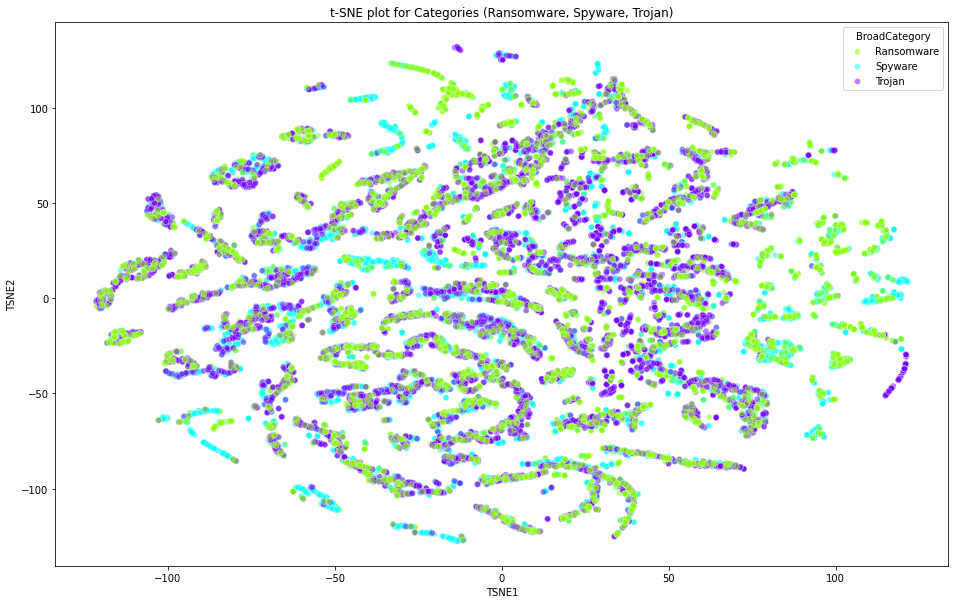

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


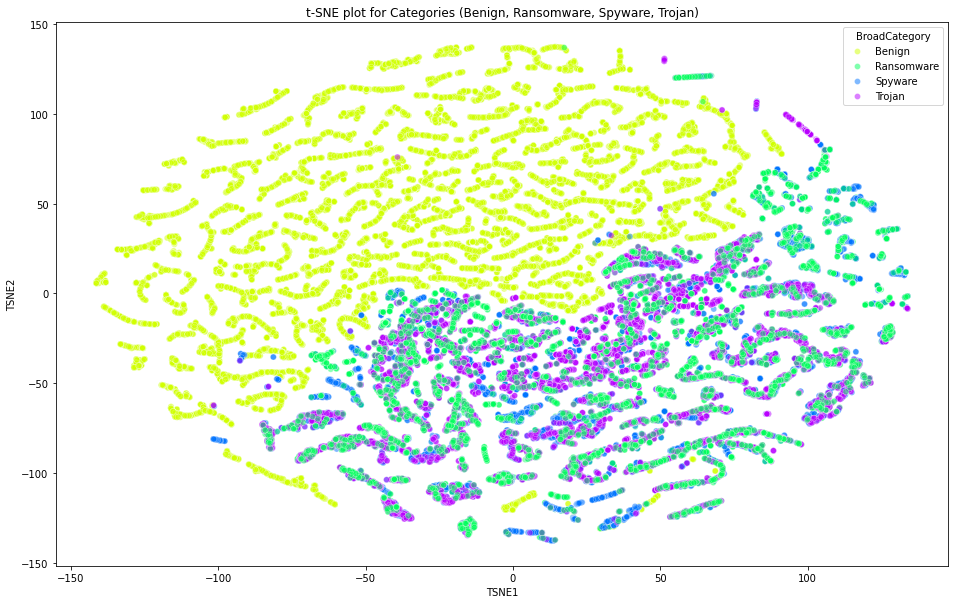

In [7]:
def map_to_broad_category(category):
    if category == 'Benign':
        return 'Benign'
    elif 'Ransomware' in category:
        return 'Ransomware'
    elif 'Spyware' in category:
        return 'Spyware'
    elif 'Trojan' in category:
        return 'Trojan'
    else:
        return 'Unknown'

df['BroadCategory'] = df['Category'].apply(map_to_broad_category)

df = df[df['BroadCategory'] != 'Unknown']

df_trs = df[df['BroadCategory'].isin(['Ransomware', 'Spyware', 'Trojan'])]

features_trs = df_trs.select_dtypes(include=['number'])
labels_trs = df_trs['BroadCategory']

tsne_trs = TSNE(n_components=2, random_state=42)
tsne_results_trs = tsne_trs.fit_transform(features_trs)

df_trs['TSNE1'] = tsne_results_trs[:, 0]
df_trs['TSNE2'] = tsne_results_trs[:, 1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x='TSNE1', y='TSNE2',
    hue='BroadCategory',
    palette=sns.color_palette('hsv', len(df_trs['BroadCategory'].unique())),
    data=df_trs,
    legend='full',
    alpha=0.5
)
plt.title('t-SNE plot for Categories (Ransomware, Spyware, Trojan)')

plt.savefig('t-SNE3Classes.png')
# Save also as EPS with tight layout
plt.savefig('t-SNE3ClassesTight.eps', format='eps', dpi=1200, bbox_inches='tight')
plt.savefig('t-SNE3Classes.eps', format='eps', dpi=1200)
plt.show()

############################################################################################
df_brst = df[df['BroadCategory'].isin(['Benign', 'Ransomware', 'Spyware', 'Trojan'])]

features_brst = df_brst.select_dtypes(include=['number'])
labels_brst = df_brst['BroadCategory']

tsne_brst = TSNE(n_components=2, random_state=42)
tsne_results_brst = tsne_brst.fit_transform(features_brst)

df_brst['TSNE1'] = tsne_results_brst[:, 0]
df_brst['TSNE2'] = tsne_results_brst[:, 1]

plt.figure(figsize=(16,10))

sns.scatterplot(
    x='TSNE1', y='TSNE2',
    hue='BroadCategory',
    palette=sns.color_palette('hsv', len(df_brst['BroadCategory'].unique())),
    data=df_brst,
    legend='full',
    alpha=0.5
)
plt.title('t-SNE plot for Categories (Benign, Ransomware, Spyware, Trojan)')

plt.savefig('t-SNE4Classes.png')
# Save also as EPS with tight layout
plt.savefig('t-SNE4ClassesTight.eps', format='eps', dpi=1200, bbox_inches='tight')
plt.savefig('t-SNE4Classes.eps', format='eps', dpi=1200)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


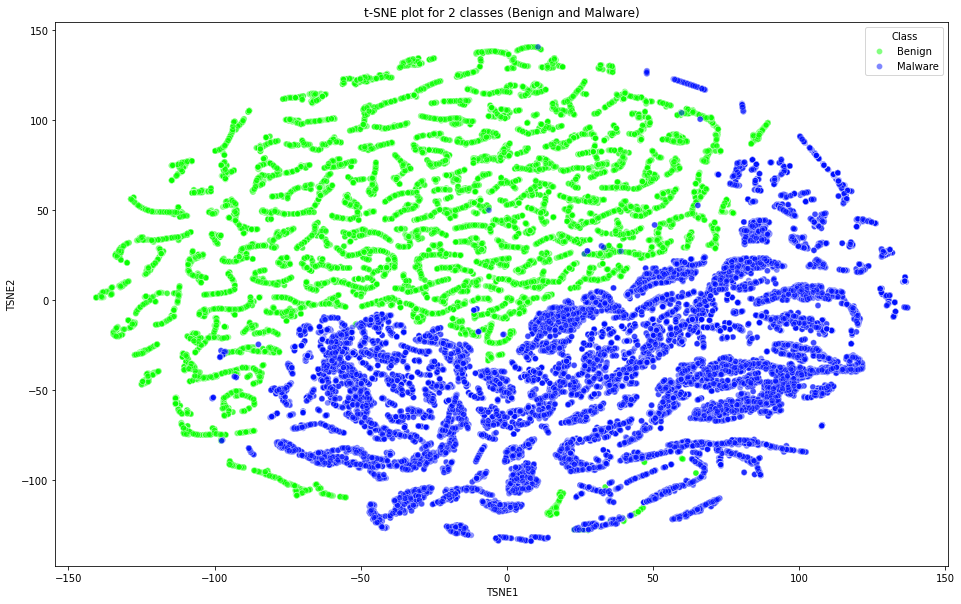

In [6]:
def map_to_two_classes(category):
    if category == 'Benign':
        return 'Benign'
    else:
        return 'Malware'

# Apply the mapping function
df['Class'] = df['Class'].apply(map_to_two_classes)

# Filter out unnecessary columns and perform t-SNE
features = df.drop(columns=['Category', 'Class'])
labels = df['Class']

features = pd.get_dummies(features)

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features)

df['TSNE1'] = tsne_results[:, 0]
df['TSNE2'] = tsne_results[:, 1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x='TSNE1', y='TSNE2',
    hue='Class',
    palette=sns.color_palette('hsv', len(df['Class'].unique())),
    data=df,
    legend='full',
    alpha=0.5
)
plt.title('t-SNE plot for 2 classes (Benign and Malware)')
# Save the image before showing it
plt.savefig('t-SNE3Classes.png', bbox_inches='tight') 
plt.savefig('t-SNE2Classes.eps', format='eps', dpi=1200, bbox_inches='tight')

plt.show()

In [10]:
#modifying for TSNE error

def map_to_family(category):
    if category == 'Benign':
        return 'Benign'
    elif 'Ransomware-Ako' in category:
        return 'Ransomware-Ako'
    elif 'Ransomware-Conti' in category:
        return 'Ransomware-Conti'
    elif 'Ransomware-Maze' in category:
        return 'Ransomware-Maze'
    elif 'Ransomware-Pysa' in category:
        return 'Ransomware-Pysa'
    elif 'Ransomware-Shade' in category:
        return 'Ransomware-Shade'
    elif 'Spyware-180solutions' in category:
        return 'Spyware-180solutions'
    elif 'Spyware-CWS' in category:
        return 'Spyware-CWS'
    elif 'Spyware-Gator' in category:
        return 'Spyware-Gator'
    elif 'Spyware-TIBS' in category:
        return 'Spyware-TIBS'
    elif 'Spyware-Transponder' in category:
        return 'Spyware-Transponder'
    elif 'Trojan-Emotet' in category:
        return 'Trojan-Emotet'
    elif 'Trojan-Reconyc' in category:
        return 'Trojan-Reconyc'
    elif 'Trojan-Refroso' in category:
        return 'Trojan-Refroso'
    elif 'Trojan-Scar' in category:
        return 'Trojan-Scar'
    elif 'Trojan-Zeus' in category:
        return 'Trojan-Zeus'
    else:
        return 'Unknown'

df['Family'] = df['Category'].apply(map_to_family)

df = df[df['Family'] != 'Unknown']
# Drop non-numerical columns like 'Category', 'Family', 'Class'
features = df.drop(columns=['Category', 'Family', 'Class'])

# Ensure that features are only numeric
print(features.dtypes)  # Check for any non-numeric data types

# Check for missing values
print(features.isnull().sum())

# Convert any categorical columns to numeric if necessary
# features = pd.get_dummies(features)  # Uncomment if you need to convert categorical columns

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features)

# Store the t-SNE results in the DataFrame
df['TSNE1'] = tsne_results[:, 0]
df['TSNE2'] = tsne_results[:, 1]

# Plotting
plt.figure(figsize=(16,10))
sns.scatterplot(
    x='TSNE1', y='TSNE2',
    hue='Family',
    palette=sns.color_palette('hsv', len(df['Family'].unique())),
    data=df,
    legend='full',
    alpha=0.5
)
plt.title('t-SNE plot including Benign (16 classes)')
plt.legend(bbox_to_anchor=(1.1, 1.1), loc='upper right')
plt.savefig('t-SNE16Classes.png', bbox_inches='tight')
plt.savefig('t-SNE16Classes.eps', format='eps', dpi=1200, bbox_inches='tight')
plt.show()


pslist.nproc                                int64
pslist.nppid                                int64
pslist.avg_threads                        float64
pslist.nprocs64bit                          int64
pslist.avg_handlers                       float64
dlllist.ndlls                               int64
dlllist.avg_dlls_per_proc                 float64
handles.nhandles                            int64
handles.avg_handles_per_proc              float64
handles.nport                               int64
handles.nfile                               int64
handles.nevent                              int64
handles.ndesktop                            int64
handles.nkey                                int64
handles.nthread                             int64
handles.ndirectory                          int64
handles.nsemaphore                          int64
handles.ntimer                              int64
handles.nsection                            int64
handles.nmutant                             int64


ValueError: could not convert string to float: 'Benign'

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


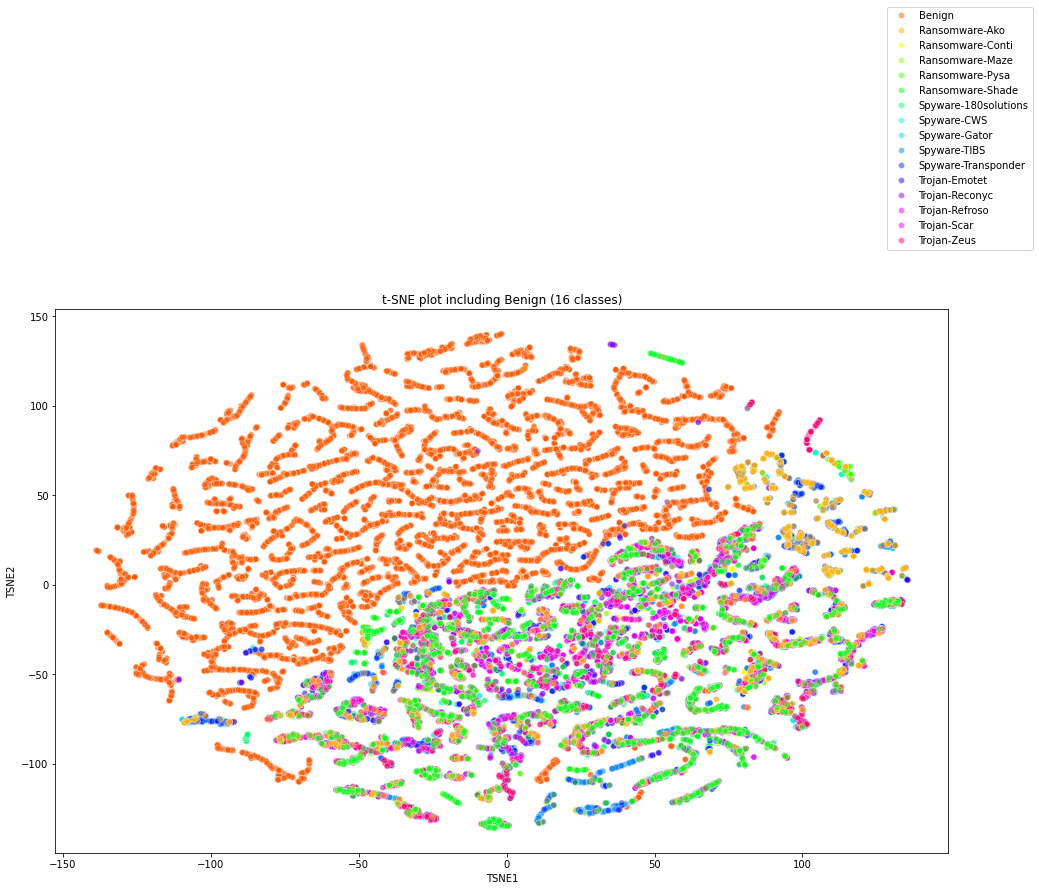

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


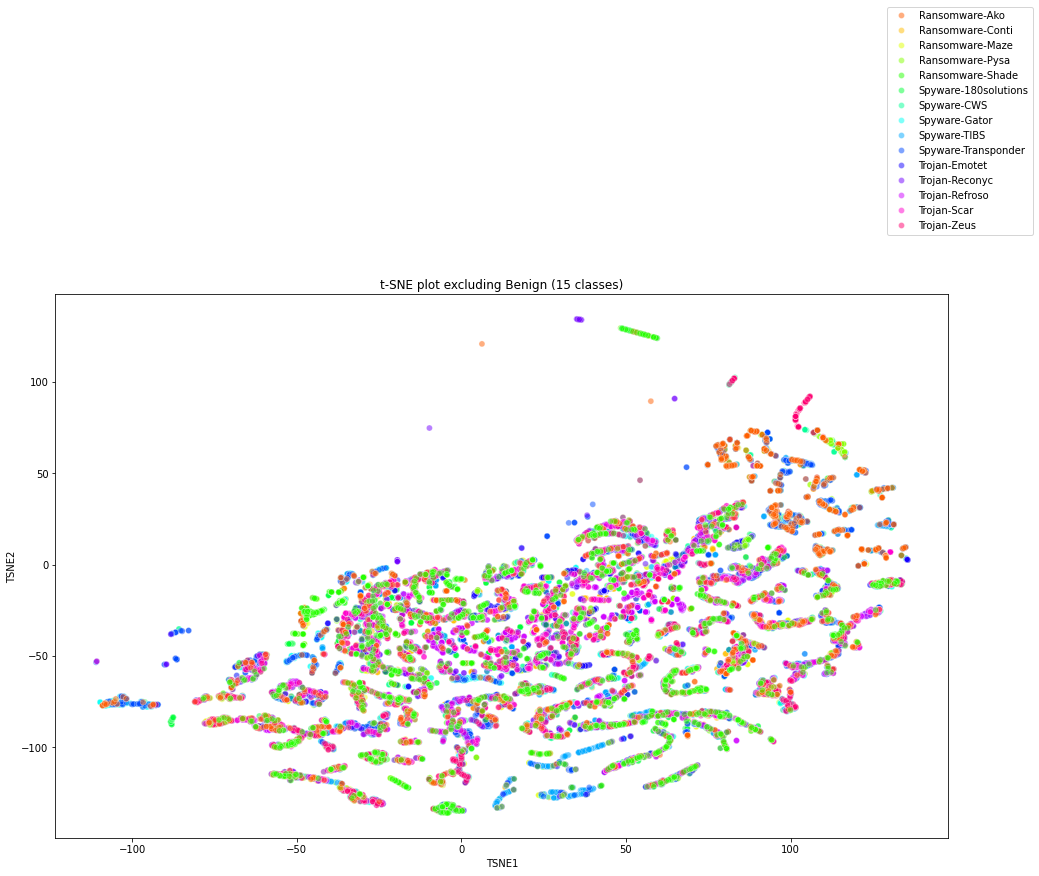

In [16]:
def map_to_family(category):
    if category == 'Benign':
        return 'Benign'
    elif 'Ransomware-Ako' in category:
        return 'Ransomware-Ako'
    elif 'Ransomware-Conti' in category:
        return 'Ransomware-Conti'
    elif 'Ransomware-Maze' in category:
        return 'Ransomware-Maze'
    elif 'Ransomware-Pysa' in category:
        return 'Ransomware-Pysa'
    elif 'Ransomware-Shade' in category:
        return 'Ransomware-Shade'
    elif 'Spyware-180solutions' in category:
        return 'Spyware-180solutions'
    elif 'Spyware-CWS' in category:
        return 'Spyware-CWS'
    elif 'Spyware-Gator' in category:
        return 'Spyware-Gator'
    elif 'Spyware-TIBS' in category:
        return 'Spyware-TIBS'
    elif 'Spyware-Transponder' in category:
        return 'Spyware-Transponder'
    elif 'Trojan-Emotet' in category:
        return 'Trojan-Emotet'
    elif 'Trojan-Reconyc' in category:
        return 'Trojan-Reconyc'
    elif 'Trojan-Refroso' in category:
        return 'Trojan-Refroso'
    elif 'Trojan-Scar' in category:
        return 'Trojan-Scar'
    elif 'Trojan-Zeus' in category:
        return 'Trojan-Zeus'
    else:
        return 'Unknown'

# def map_to_family(category):
#     switcher = {
#         'Benign': 'Benign',
#         'Ransomware-Ako': 'Ransomware-Ako',
#         'Ransomware-Conti': 'Ransomware-Conti',
#         'Ransomware-Maze': 'Ransomware-Maze',
#         'Ransomware-Pysa': 'Ransomware-Pysa',
#         'Ransomware-Shade': 'Ransomware-Shade',
#         'Spyware-180solutions': 'Spyware-180solutions',
#         'Spyware-CWS': 'Spyware-CWS',
#         'Spyware-Gator': 'Spyware-Gator',
#         'Spyware-TIBS': 'Spyware-TIBS',
#         'Spyware-Transponder': 'Spyware-Transponder',
#         'Trojan-Emotet': 'Trojan-Emotet',
#         'Trojan-Reconyc': 'Trojan-Reconyc',
#         'Trojan-Refroso': 'Trojan-Refroso',
#         'Trojan-Scar': 'Trojan-Scar',
#         'Trojan-Zeus': 'Trojan-Zeus'
#     }

#     # Default case when no match is found
#     return switcher.get(category, 'Unknown')


df['Family'] = df['Category'].apply(map_to_family)

df = df[df['Family'] != 'Unknown']
features = df.drop(columns=['Category', 'Family', 'Class'])
labels = df['Family']

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features)

df['TSNE1'] = tsne_results[:, 0]
df['TSNE2'] = tsne_results[:, 1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x='TSNE1', y='TSNE2',
    hue='Family',
    palette=sns.color_palette('hsv', len(df['Family'].unique())),
    data=df,
    legend='full',
    alpha=0.5
)
plt.title('t-SNE plot including Benign (16 classes)')
plt.legend(bbox_to_anchor=(1.1, 1.1), loc='lower right')
plt.savefig('t-SNE16Classes.png', bbox_inches='tight') 
plt.savefig('t-SNE16Classes.eps', format='eps', dpi=1200, bbox_inches='tight')
plt.show()
#########################################################################################################
df_no_benign = df[df['Family'] != 'Benign']
plt.figure(figsize=(16,10))
sns.scatterplot(
    x='TSNE1', y='TSNE2',
    hue='Family',
    palette=sns.color_palette('hsv', len(df_no_benign['Family'].unique())),
    data=df_no_benign,
    legend='full',
    alpha=0.5
)
plt.title('t-SNE plot excluding Benign (15 classes)')
plt.legend(bbox_to_anchor=(1.1, 1.1), loc='lower right')
# Save the image before showing it
plt.savefig('t-SNE15Classes.png', bbox_inches='tight') 
plt.savefig('t-SNE15Classes.eps', format='eps', dpi=1200, bbox_inches='tight')
plt.show()

The t-SNE visualization shows clear clustering of different classes, from which we understand what and all features used are effective in distinguishing between classes.

t-SNE is used to reduce the dimensionality of the dataset and capture complex relationships in the data that PCA might have missed-->useful for data visualisations where traditional plotting methods fail to show the structure due to high pixels or dimensions.

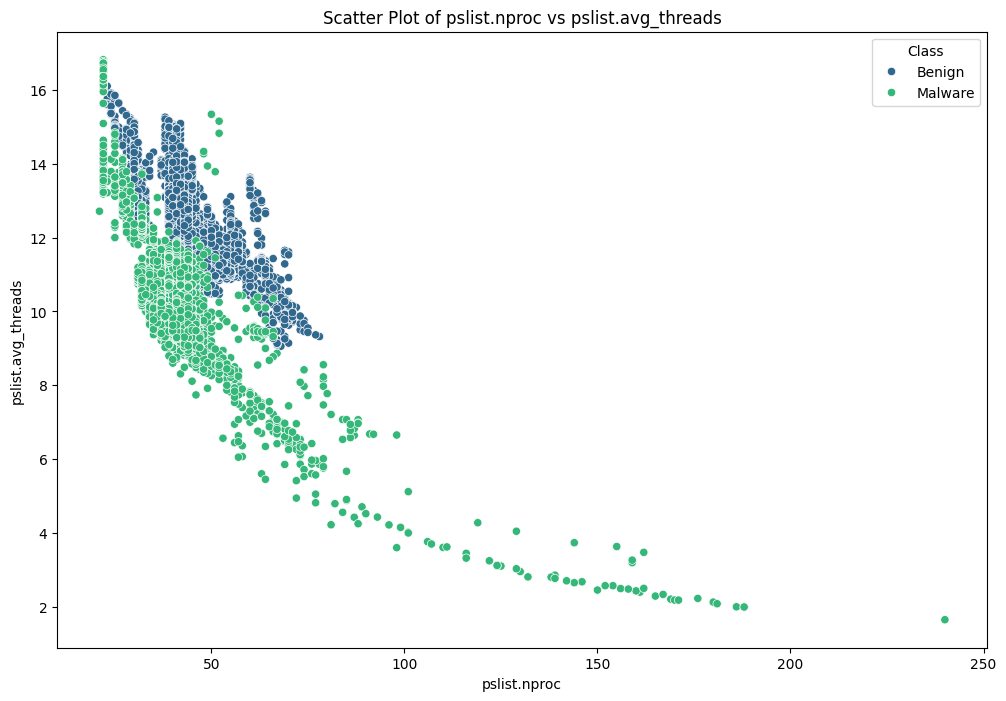

In [ ]:
# Scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=cleaned_data, x='pslist.nproc', y='pslist.avg_threads', hue='Class', palette='viridis')
plt.title('Scatter Plot of pslist.nproc vs pslist.avg_threads')
plt.show()

There is a noticeable pattern in the scatter plot where different classes occupy distinct regions, suggesting that both pslist.nproc and pslist.avg_threads are useful features for class separation.

Most of then are clustered in 6-16 pslist.avg_threads regions indicating the presence of both malware and benign datasets around the 50-80 number of processes.

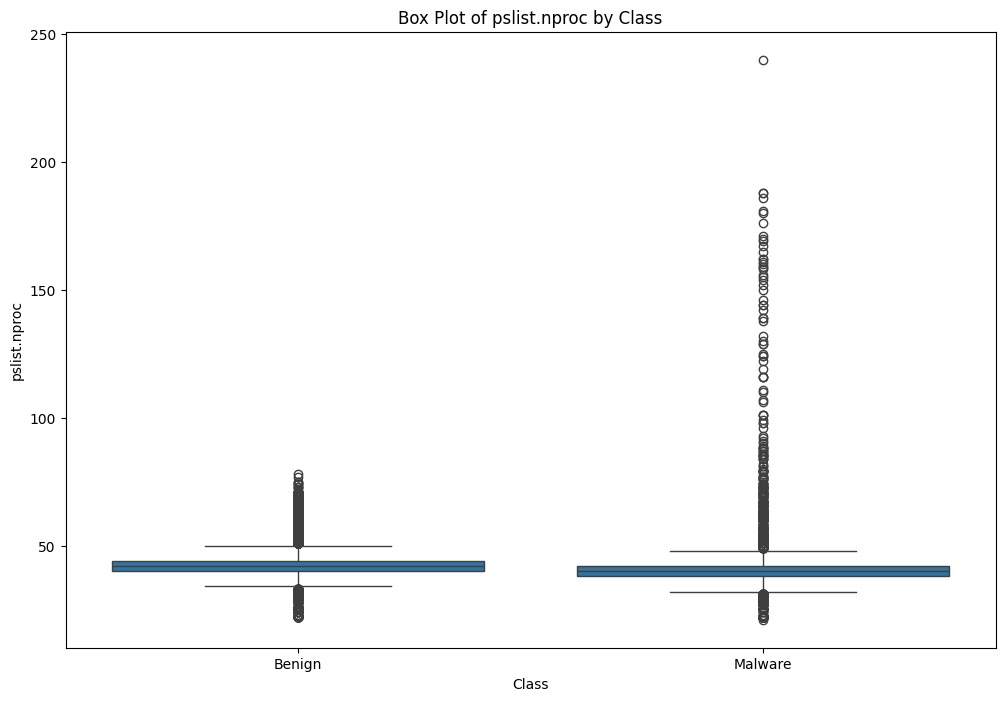

In [ ]:
# Box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=cleaned_data, x='Class', y='pslist.nproc')
plt.title('Box Plot of pslist.nproc by Class')
plt.show()

The box plot shows that the middle value (median) and the spread of pslist.nproc (number of processes) are very different for each class.

The data is normal and balanced showing no skewness, however there are outliers present for both the Classes i.e Benign and Malware.

This suggests that the number of processes is an important feature for distinguishing between the different classes.

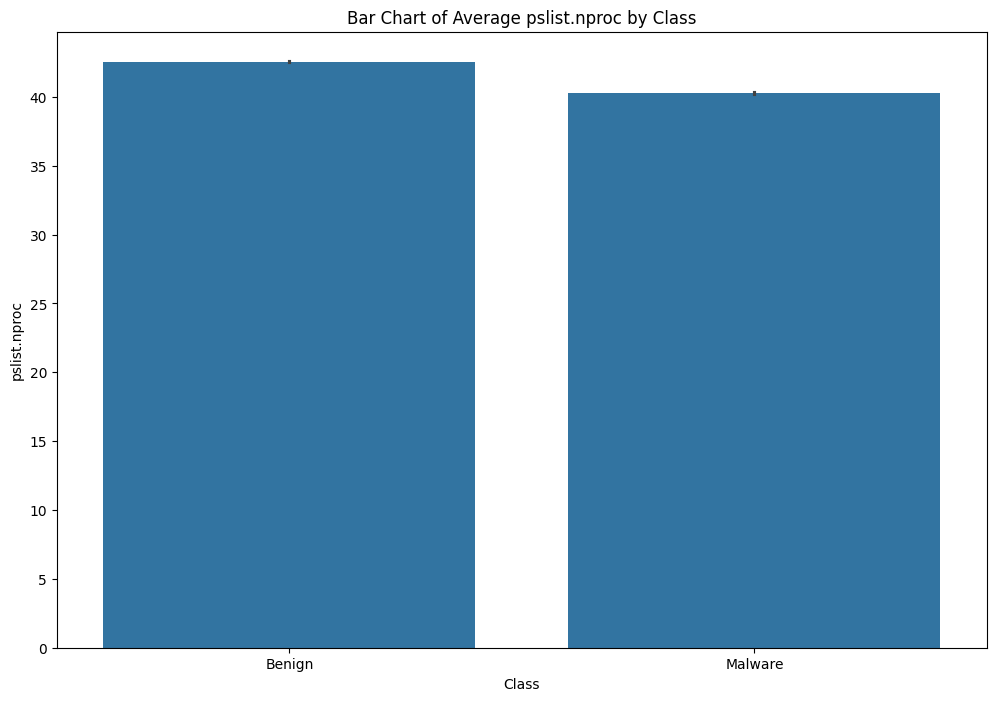

In [ ]:
# Bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=cleaned_data, x='Class', y='pslist.nproc')
plt.title('Bar Chart of Average pslist.nproc by Class')
plt.show()

The bar graph illustrates how different classes have significantly different averages for the average number of processes (pslist.nproc), with some classes having significantly larger or lower averages.

There is not much difference between both the bars due the the balanced number of Benign anf Malware PDF's in the dataset/

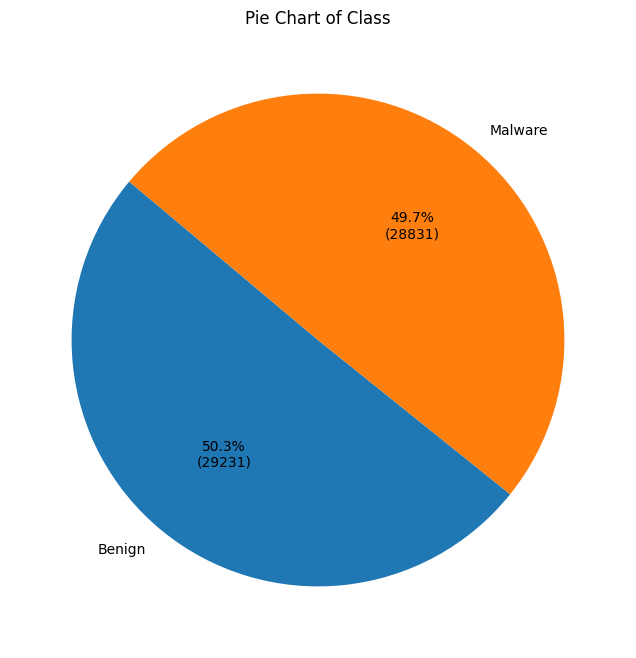

In [ ]:
# Pie chart showing the distribution of classes
value_counts = cleaned_data['Class'].value_counts()
labels = value_counts.index
sizes = value_counts.values

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({val:d})'
    return my_format

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct=autopct_format(sizes), startangle=140)
plt.title('Pie Chart of Class')
plt.show()

The pie chart shows the distribution of the 'Class' column.--> indicates that there is almost 50% division of Benign and Malware PDF files.The dataset has mixed Benign and Malware PDFs.

Target Variable : Class

<Figure size 1600x1200 with 0 Axes>

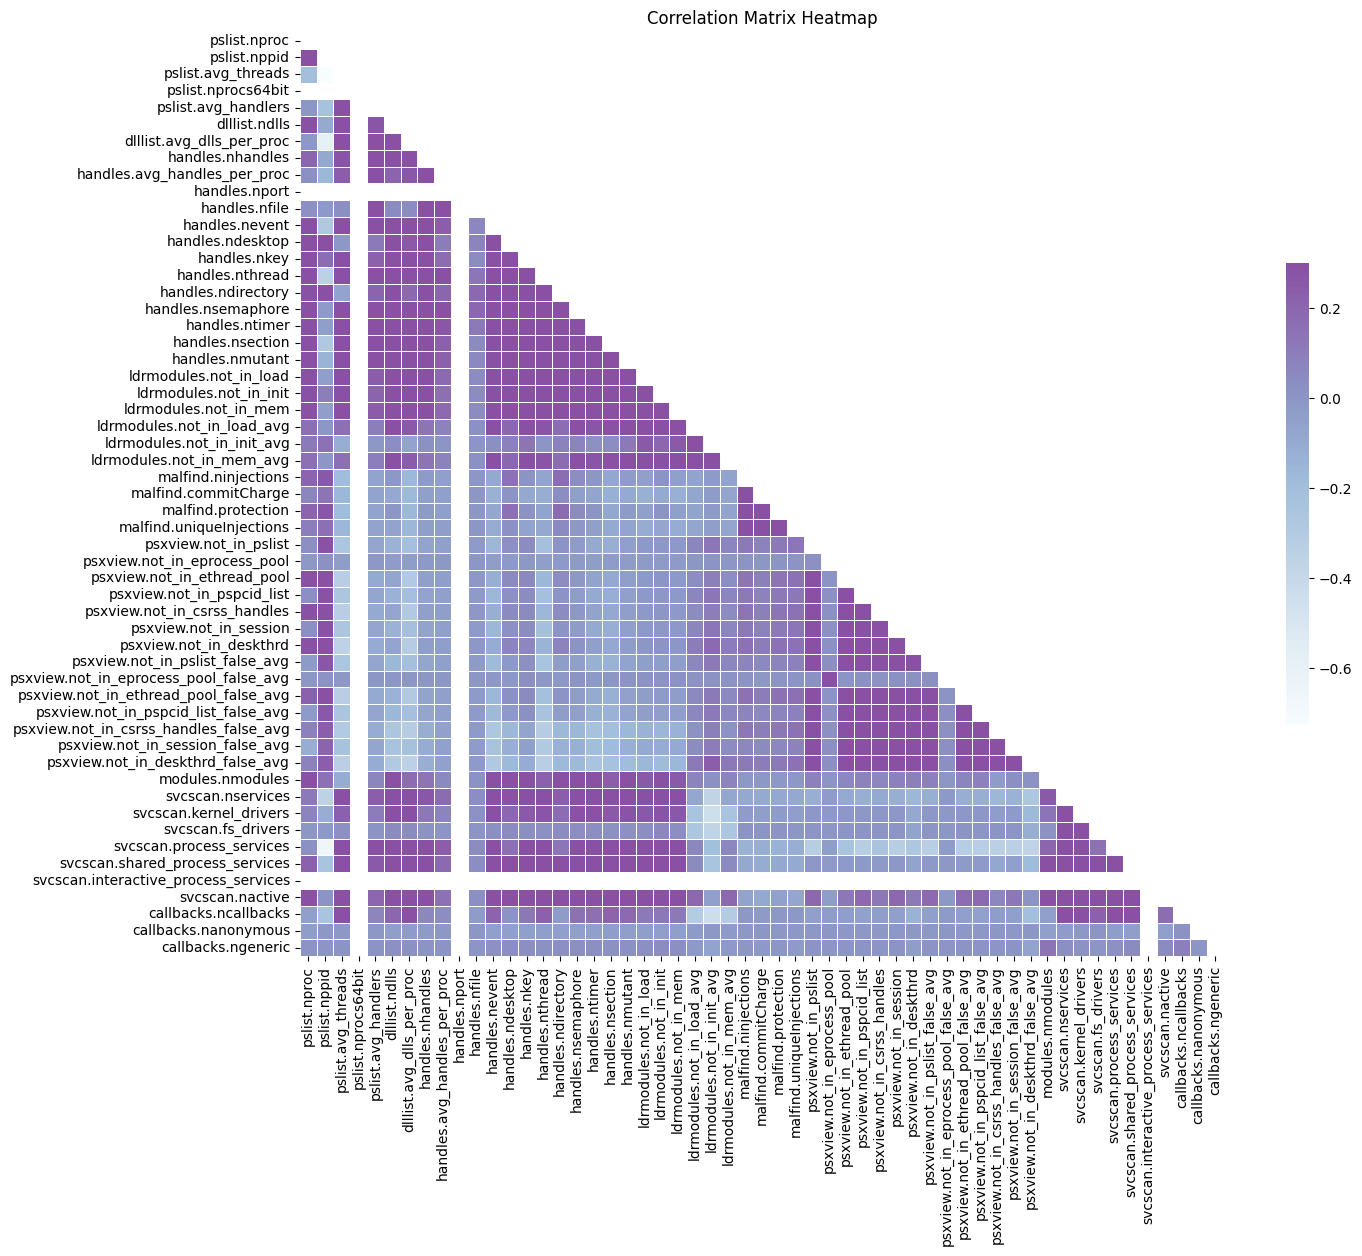

In [ ]:
#heatmap
plt.figure(figsize=(16, 12))
correlation_matrix = cleaned_data.select_dtypes(include=['number']).corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
f, ax = plt.subplots(figsize=(16, 12))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(correlation_matrix, mask=mask, cmap="BuPu", vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix Heatmap')
plt.show()

The heatmap indicates that some features have strong correlations, both positive and negative, which can be useful for feature selection and understanding feature engineering and further data analysis.

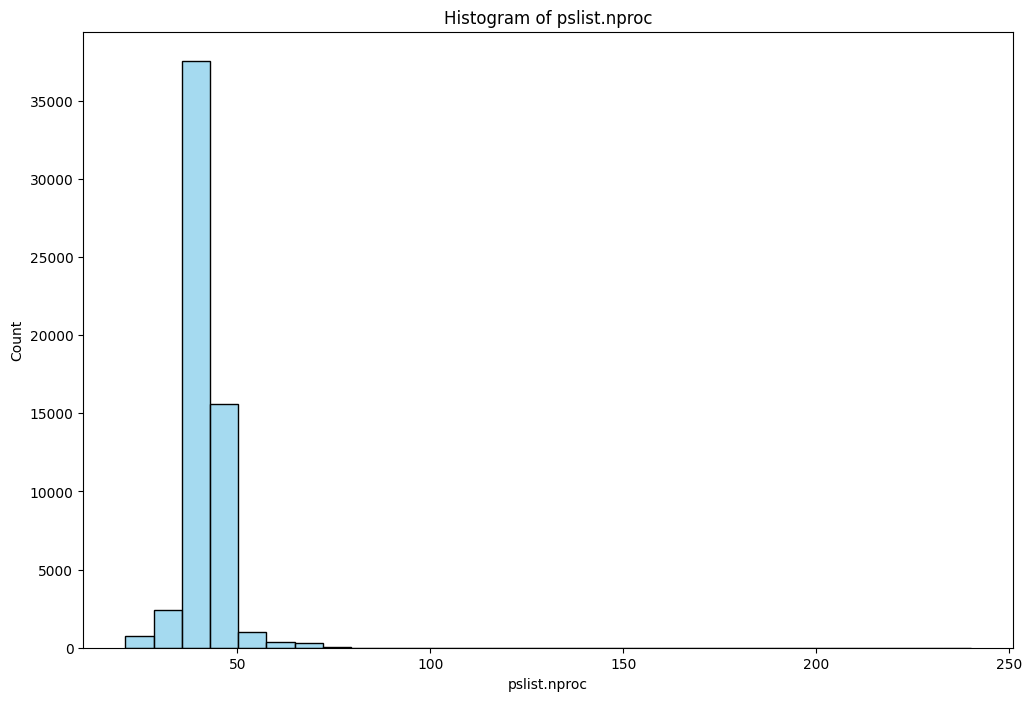

In [ ]:
# Histogram
plt.figure(figsize=(12, 8))
sns.histplot(cleaned_data['pslist.nproc'], bins=30, color='skyblue')
plt.title('Histogram of pslist.nproc')
plt.show()

The histogram shows the distribution of pslist.nproc, indicating the most common number of processes in the dataset.

The graph is slightly right skewed showing a slight imbalance in the number of processes.

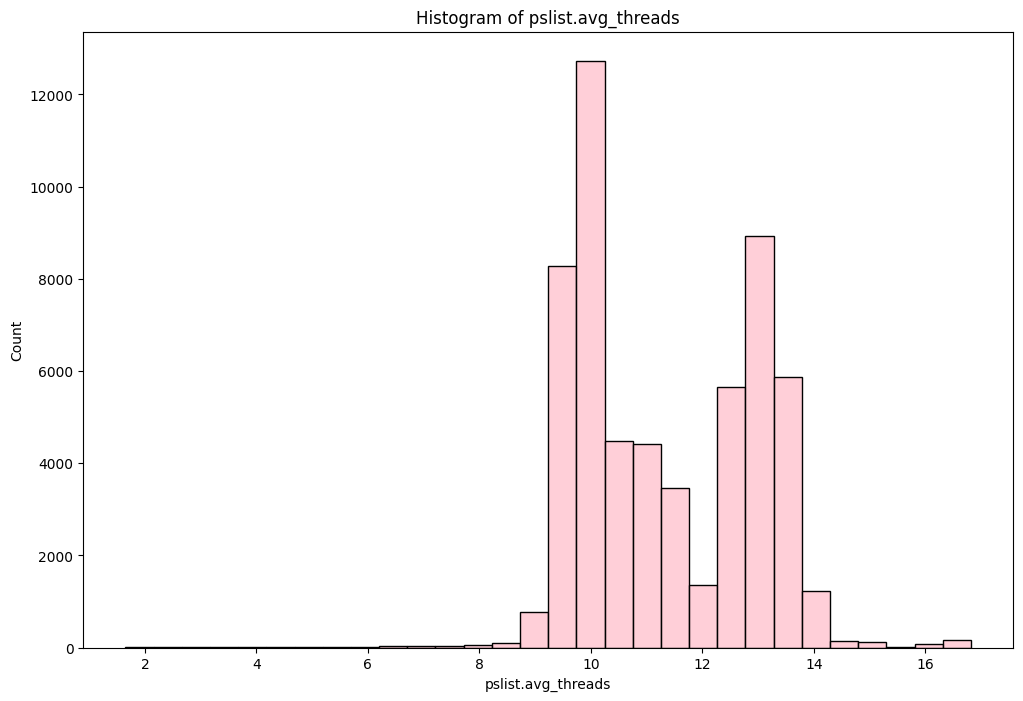

In [ ]:
# Histogram
plt.figure(figsize=(12, 8))
sns.histplot(cleaned_data['pslist.avg_threads'], bins=30, color='pink')
plt.title('Histogram of pslist.avg_threads')
plt.show()

The dataset's average thread count (pslist.avg_threads) is distributed according to a histogram.

Fewer processes have a larger average number of threads than the majority, which has a comparatively low average number of threads.



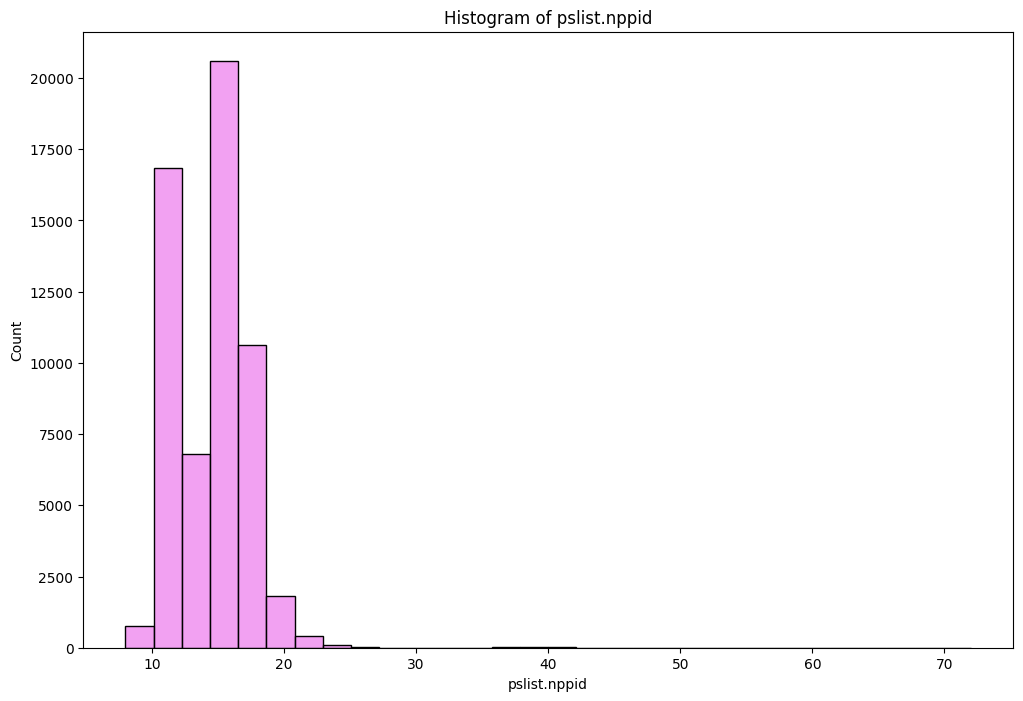

In [ ]:
# Histogram
plt.figure(figsize=(12, 8))
sns.histplot(cleaned_data['pslist.nppid'], bins=30, color='violet')
plt.title('Histogram of pslist.nppid')
plt.show()

The distribution of the dataset's parent process IDs (pslist.nppid) is shown by the histogram.

In contrast to pslist.avg_threads, the data is more spread out, indicating a greater range in the number of parent processes.


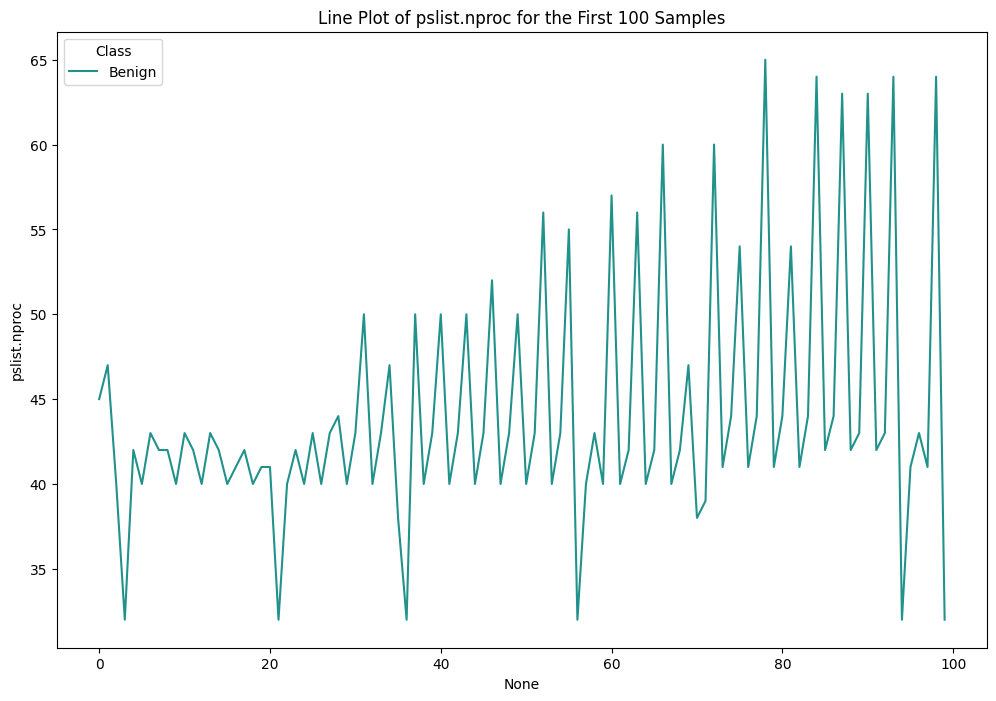

In [ ]:
# Line plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=cleaned_data.iloc[:100], x=cleaned_data.index[:100], y='pslist.nproc', hue='Class', palette='viridis')
plt.title('Line Plot of pslist.nproc for the First 100 Samples')
plt.show()

The first 100 samples line plot, which can be helpful for temporal or sequential analysis, displays patterns and oscillations in pslist.nproc across several classes.

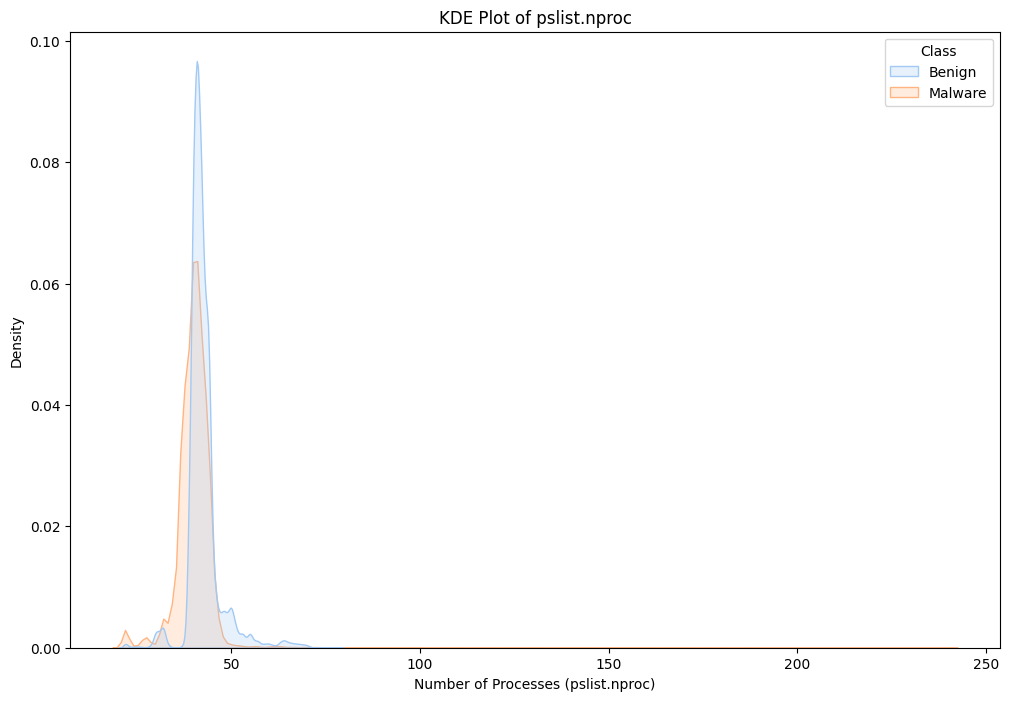

In [ ]:
# KDE plot of a specific feature
plt.figure(figsize=(12, 8))
sns.kdeplot(data=cleaned_data, x='pslist.nproc', hue='Class', fill=True, palette='pastel')
plt.title('KDE Plot of pslist.nproc')
plt.xlabel('Number of Processes (pslist.nproc)')
plt.ylabel('Density')
plt.show()

The density of *pslist.nproc* varies significantly between different classes, indicating that the number of processes is a distinguishing feature for classifying the data.

For benign, pslist.nproc density touches almost 0.095 whereas for malware it touches the range of 0.06-0.062.